In [3]:
using PyPlot

INFO: Loading help data...


### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?

```julia
bits(0.1)
"0111111111110000000000000000000000000000000000000000000000000000"
```

La casilla $n+1$ se asocia al número 2^n, si la casilla tiene un 1, entonces la casilla $n+1$ está codificada en términos de $n$.

### Ejercicio 2

a) ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

b) ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


In [4]:
1-.000000000000001

0.999999999999999

a)El epsilon de la máquina es $.000000000000001$

In [5]:
10-.000000000000001

9.999999999999998

b).000000000000001

### Ejercicio 3

Define una functión llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

In [6]:
function derivada1(f,x_0)
    h=.000001
(f(x_0+h)-f(x_0))/h
end

derivada1 (generic function with 1 method)

La medida de qué tan buena es la aproximación depende de $h$, entre más pequeña sea $h$ tendremos una nueva aproximación.

In [25]:
polinomio(x)=x^5+x^2-1
derivada1(polinomio,0)

9.999778782798785e-7

La función $arreglo(f,n,h)$ toma como argumento una función, $n$ el tamaño del intervalo de nuestro arreglo y el tamaño de paso $h$.

In [8]:
function arreglo(f,n,h)
    x=[1:h:n]
 
    a=zeros([1:h:n])
    for i in 1:length(a)
        a[i]=f(x[i])
    end
    hcat(x,a)
end

arreglo (generic function with 1 method)

En la siguiente gráficas se muestra el polinomio $f(x)=x^5+x^2-1$ y su derivada $f'(x)=5x^4+2x$

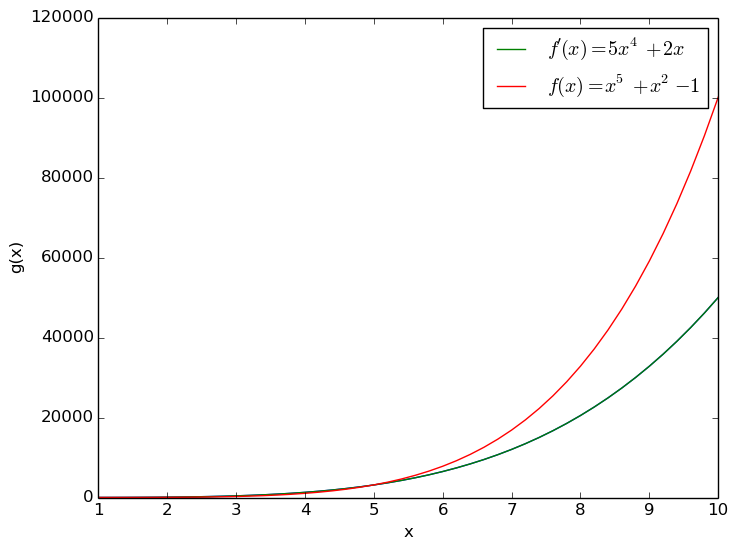

In [22]:
a=[1:.2:10]
b=zeros(a)
for i in 1:length(a)
    b[i]=derivada1(polinomio,a[i])
end
plot(a,b)
a_1=arreglo(polinomio,10,.2)
plot(a,b,label=L"$f'(x)=5x^4+2x$")
plot(a_1[:,1],a_1[:,2],label=L"$f(x)=x^5+x^2-1$")
xlabel("x")
ylabel("g(x)")
legend();


Podemos notar que el polinomio crece más rápido que su derivada, lo cual concuerda con lo esperado de la derivada.

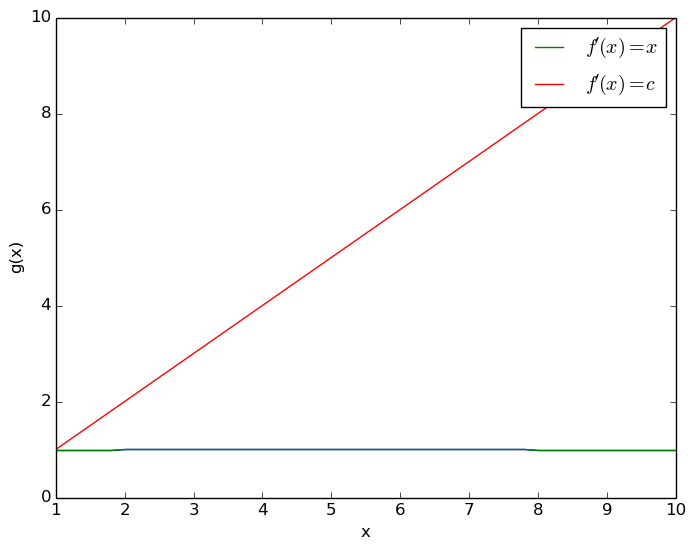

In [24]:
h(x)=x
c=[1:.2:10]
d=zeros(c)
for i in 1:length(c)
    d[i]=derivada1(h,c[i])
end
plot(c,d)
a_2=arreglo(h,10,.2)
plot(c,d,label=L"$f'(x)=x$")
plot(a_2[:,1],a_2[:,2],label=L"$f'(x)=c$")
xlabel("x")
ylabel("g(x)")
legend();


En la siguiente gráfica se puede visualizar claramente el funcionamiento de la función $derivada1(f, x_0)$ pues la derivada de la función identidad es una constante.

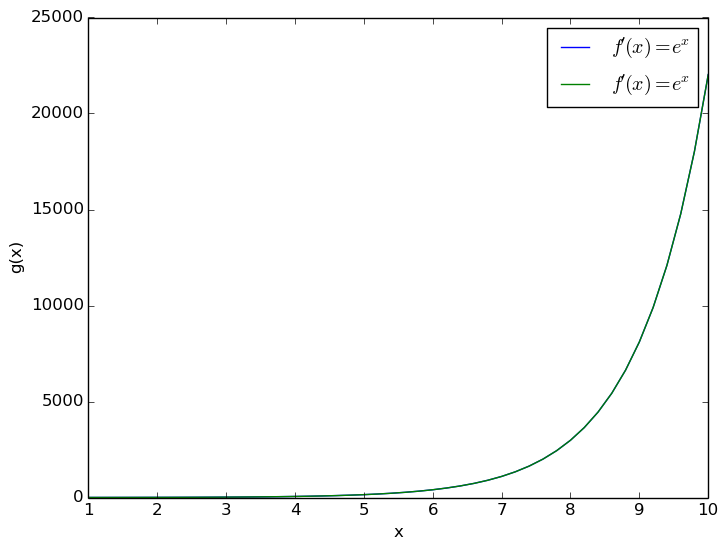

In [35]:
j(x)=exp(x)
e=[1:.2:10]
k=zeros(e)
for i in 1:length(e)
    k[i]=derivada1(j,e[i])
end

a_3=arreglo(j,10,.2)
plot(e,k,label=L"$f'(x)=e^x$")
plot(a_3[:,1],a_3[:,2],label=L"$f'(x)=e^x$")
xlabel("x")
ylabel("g(x)")
legend();


Como podemos ver, las gráficas de $f(x)=f'(x)=e^x$ se superponen por lo que podemos decir que nuestra función $derivada1$ nos da una buena aproximación de la derivada de una función.

### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?


In [47]:
function derivada2(f,x_0)
    h=.000001
    (f(x_0+h)-f(x_0-h))/2h
end

derivada2 (generic function with 1 method)

In [56]:
derivada2(j,0)-j(0)

-2.6755486715046572e-11

In [57]:
derivada1(j,0)-j(0)

4.999621836532242e-7

Como podemos el error de $derivada2$ es menor al de $derivada1$ por 4 órdenes de magnitud

El error es proporcional a $2h$ entonces el error de $derivada2$ diminuye con el doble de rapidez que el error de $derivada1$ que es proporcional a $h$.

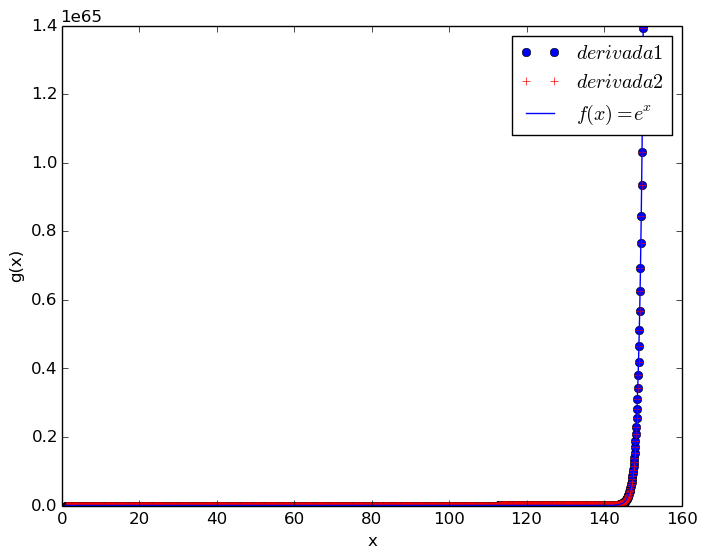

In [55]:

ñ=[1:.1:150]
k=zeros(ñ)
m=zeros(ñ)
for i in 1:length(ñ)
    k[i]=derivada1(j,ñ[i])
end
for i in 1:length(ñ)
    m[i]=derivada2(j,ñ[i])
end
a_4=arreglo(j,150,.1)
plot(ñ,k,label=L"$derivada1$","bo")
plot(ñ,m,label=L"$derivada2$","r+")
plot(a_4[:,1],a_4[:,2],label=L"$f(x)=e^x$")
xlabel("x")
ylabel("g(x)")
legend();


En esta gráfica se visualiza mínimamente que $derivada2$ es mejor aproximación que $derivada1$ de la función $f(x)=e^x$